In [1]:
import pandas as pd
import seaborn as sns
from tpot import TPOTClassifier  # tpot
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler # 归一化
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [3]:
# 数据集的加载
train_df = pd.read_csv('F:/BI/第三周/名企班/code/titanic/train.csv')
test_df = pd.read_csv('F:/BI/第三周/名企班/code/titanic/test.csv')

In [4]:
# 数据显示
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


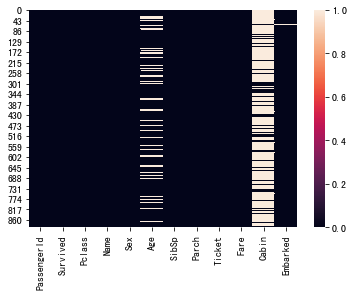

In [6]:
# 缺失值热力图可视化
sns.heatmap(train_df.isnull())
plt.show()

In [3]:
#数据分析

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_df['PassengerId'].unique().shape

(891,)

In [10]:
test_df['PassengerId'].unique().shape

(418,)

In [11]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Herman, Miss. Alice",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Badman, Miss. Emily Louisa",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [4]:
# 数据清洗

In [13]:
# 保存预测结果
test_PassengerId = test_df['PassengerId']

In [14]:
# 指定合并训练集和测试集后拆分时进行切片的终止点
train_length = train_df.shape[0]

In [15]:
target = train_df['Survived']

In [16]:
df_all = pd.concat((train_df.drop(columns='Survived'), test_df), axis=0).reset_index(drop=True)
df_all

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 缺失值处理

In [17]:
df_all.isnull().sum(axis=0)

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

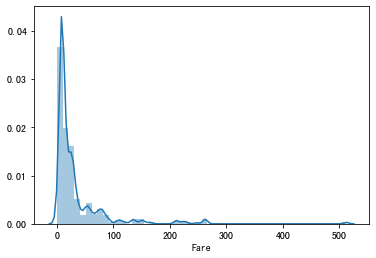

In [18]:
sns.distplot(df_all['Fare'])

In [19]:
# 衍生特征FamilySize家庭成员人数
df_all['FamilySize'] = df_all['SibSp'] + df_all['Parch'] + 1

In [20]:
df_all['FamilySize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [21]:
df_all[df_all['FamilySize'] > 0][['FamilySize', 'Fare']]

,FamilySize,Fare
0,2,7.2500
1,2,71.2833
2,1,7.9250
3,2,53.1000
4,1,8.0500
...,...,...
1304,1,8.0500
1305,1,108.9000
1306,1,7.2500
1307,1,8.0500


In [22]:
# 找相同票号的船票
tickes = df_all['Ticket'].value_counts()

In [23]:
tickes

CA. 2343      11
1601           8
CA 2144        8
3101295        7
347082         7
              ..
9234           1
A/5. 2151      1
347083         1
C.A. 34260     1
237249         1
Name: Ticket, Length: 929, dtype: int64

In [24]:
# 一共有216张票存在多人共用
tickes[tickes > 1].describe()

count    216.000000
mean       2.759259
std        1.352829
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: Ticket, dtype: float64

In [25]:
# 统计每个票号对应的团队票数
df_all['TeamTicket'] = df_all['Ticket'].map(tickes.to_dict())

In [26]:
df_all.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,TeamTicket
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2


In [27]:
# 衍生特征UnitFare单位船价
df_all['UnitFare'] = df_all['Fare'] / df_all['TeamTicket']

In [28]:
df_all.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,TeamTicket,UnitFare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,7.25000
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,35.64165


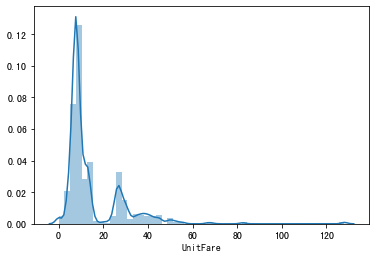

In [29]:
sns.distplot(df_all['UnitFare'])

In [30]:
# 不同船票等级价格应该不同，所以统计下不同船票等级下的船票单价的均值
average_in_Pclass = df_all.groupby(by='Pclass')['UnitFare'].agg('mean')
average_in_Pclass

Pclass
1    33.910500
2    11.411010
3     7.329146
Name: UnitFare, dtype: float64

In [31]:
df_all.groupby(by='Pclass')['Fare'].agg('mean')

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [32]:
pclass = df_all[df_all['Fare'].isnull()]['Pclass'].values[0]
pclass

3

In [33]:
average_in_Pclass[pclass]

7.329145550847469

In [34]:
df_all['UnitFare'].fillna(average_in_Pclass[pclass], inplace=True)

In [35]:
df_all = df_all.drop(columns=['Fare', 'Ticket'])

In [5]:
# Embarked 缺失两个，频率最高值填充

In [36]:
df_all['Embarked'].fillna('S', inplace=True)

In [6]:
# drop缺失值过多数

In [37]:
df_all = df_all.drop(columns=['Cabin'])

In [38]:
df_all.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Embarked       False
FamilySize     False
TeamTicket     False
UnitFare       False
dtype: bool

In [39]:
df_all['Age'].fillna(df_all['Age'].mean(), inplace=True)

In [10]:
# 字符特征预处理

In [41]:
df_all['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [42]:
df_all['Name'].str.extract(r" ([A-Za-z]+)\.", expand=False)

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [43]:
# 将识别到的头衔保存为title列
df_all['Title'] = df_all['Name'].str.extract(r" ([A-Za-z]+)\.", expand=False)

In [44]:
df_all.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,FamilySize,TeamTicket,UnitFare,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,2,1,7.25,Mr


In [45]:
df_all[df_all['Title'] == 'Jonkheer']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,FamilySize,TeamTicket,UnitFare,Title
822,823,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,S,1,1,0.0,Jonkheer


In [46]:
df_all['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Lady          1
Jonkheer      1
Don           1
Mme           1
Countess      1
Dona          1
Capt          1
Sir           1
Name: Title, dtype: int64

In [47]:
map_dict = {}
# 士兵、军人、牧师
map_dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Soldiers'))  
# 有地位的王孙贵胄
map_dict.update(dict.fromkeys(['Don', 'Sir', 'Countess', 'Dona', 'Lady', 'Jonkheer'], 'Royalty'))  
# 已婚女士
map_dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
# 未婚女士
map_dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
# 少爷
map_dict.update(dict.fromkeys(['Master'], 'Master'))
map_dict.update(dict.fromkeys(['Mr'], 'Mr'))
# map_dict

In [48]:
df_all['Title'] = df_all['Title'].map(map_dict)

In [49]:
df_all['Title'].value_counts()

Mr          757
Miss        262
Mrs         200
Master       61
Soldiers     23
Royalty       6
Name: Title, dtype: int64

In [50]:
df_all = df_all.drop(columns=['Name'])

In [62]:
# 进行one-hot编码

In [52]:
df_all_ = pd.get_dummies(df_all)

In [54]:
df_all_ = df_all_.drop(columns=['Sex_male'])

In [63]:
# 调整集合

In [55]:
X_train = df_all_.iloc[:train_length]
x_test = df_all_.iloc[train_length:]

In [58]:
X_train = X_train.drop(columns=['PassengerId'])
x_test = x_test.drop(columns=['PassengerId'])

In [64]:
# 可视化

In [59]:
X_train['Survived'] = target
X_train.head(1)

,Pclass,Age,SibSp,Parch,FamilySize,TeamTicket,UnitFare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty,Title_Soldiers,Survived
0,3,22.0,1,0,2,1,7.25,0,0,0,1,0,0,1,0,0,0,0


In [60]:
corr_df = X_train.iloc[:, 1:].corr()

In [61]:
abs_corr = corr_df['Survived'].apply(abs).sort_values()
abs_corr

Embarked_Q        0.003650
FamilySize        0.016639
Title_Soldiers    0.031316
Title_Royalty     0.033391
SibSp             0.035322
TeamTicket        0.064962
Age               0.070323
Parch             0.081629
Title_Master      0.085221
Embarked_S        0.149683
Embarked_C        0.168240
UnitFare          0.288337
Title_Miss        0.332795
Title_Mrs         0.344935
Sex_female        0.543351
Title_Mr          0.549199
Survived          1.000000
Name: Survived, dtype: float64

In [62]:
corr_df = corr_df.loc[abs_corr.index]

In [63]:
corr_df = corr_df.loc[:, abs_corr.index[::-1]]

In [66]:
X_train = X_train.drop(columns=['Survived'])

In [68]:
transfer = MinMaxScaler()
X_train = transfer.fit_transform(X_train.values)
x_test = transfer.transform(x_test.values)

In [65]:
# 数据集拆分

In [69]:
x_train, x_val, y_train, y_val = train_test_split(X_train, target, test_size=0.3, random_state=11)

In [70]:
x_train.shape, x_val.shape

((623, 17), (268, 17))

In [71]:
# 模型的建立

In [72]:
# 1、KNN

In [73]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
print(f"{knn}的准确率:\n", accuracy_score(y_val, knn.predict(x_val)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')的准确率:
 0.8059701492537313


In [73]:
# 2、逻辑回归

In [74]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
print(f"{LR}的准确率:\n", accuracy_score(y_val, LR.predict(x_val)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)的准确率:
 0.8768656716417911


In [144]:
# 3、tpot

In [138]:
model = TPOTClassifier(
    generations=5,   
    population_size=20,  
    verbosity=2,   
)

In [140]:
model.fit(x_train, y_train)


Generation 1 - Current best internal CV score: 0.8297806451612904
Generation 2 - Current best internal CV score: 0.8297806451612904
Generation 3 - Current best internal CV score: 0.8346193548387097
Generation 4 - Current best internal CV score: 0.8410193548387097
Generation 5 - Current best internal CV score: 0.8410193548387097
Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.8, min_samples_leaf=3, min_samples_split=17, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x7fb4de0caf10>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [141]:
model.score(x_val, y_val)

0.8619402985074627